<div style="border:solid blue 2px; padding: 20px">
<b> Reviewer Rules</b>

Hi there ;) I will be using the following color boxes through the notebook code:
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Green means that it was nicely done.
    
</div>    
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>

Yellow color indicates what could be optimized. This is not necessary, but it will be great if you make changes to this project.
 
</div>      
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Red is for things that must be done or changed for me to approve the project. If I rejected the project, you must look for this comments.
    
</div>    
    
**Please, use some color other than those listed to highlight answers to my comments.**
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.

<div style="border:solid blue 2px; padding:20px;">

**Overall Summary of the Project**

Hi Nathaniel! Here you have a detailed review of your project ;)

---

**1. Strengths**

1. **Clear, Step-by-Step Workflow**  
   - You outlined each project phase well: data loading, EDA checks (no duplicates, no nulls), model training, and final profit/risk analysis.

2. **Logical Model Development**  
   - Appropriately applied **Linear Regression** to each dataset, computing the **RMSE** to gauge model accuracy.

3. **Profit Calculation & Filtering**  
   - Correctly identified the top 200 wells by predicted reserves, then computed total revenue vs. the \$100 million budget to get net profit.

4. **Bootstrapping Implementation**  
   - Employed repeated random sampling of 500 wells and selected the top 200 in each iteration to approximate profit distribution. 
   - Provided a robust measure of average profit, confidence intervals, and the proportion of negative-profit outcomes (risk).

5. **Informed Recommendation**  
   - Summarized each region's average profit, 95% confidence interval, and risk. 
   - Chose **Region 1** because it had an acceptable **risk of 1.8%** (under 2.5%) and strong average profit.

---

**2. Areas for Improvement (Optional)**

1. **Additional Validation**  
   - You could show how each region's model predictions align with actual values in more detail (e.g., correlation of predicted vs. actual, residual plots) to reinforce the reliability of the final profit calculations.

2. **Structured Code Reusability**  
   - Some functions (e.g., for bootstrapping or profit calculation) might be further parameterized or documented to facilitate reusability if the approach changes or if future analyses require a different sample size or iteration count.

3. **Expanded EDA**  
   - While you mentioned no duplicates and no missing values, a deeper look into outliers or distribution shapes for `f0`, `f1`, `f2`, and `product` might clarify how well linear regression assumptions hold.

---

**3. Critical Changes Required?**

No mandatory changes are required.

---

**Status: approved**

Your solution meets the project’s specifications:
- **Data** thoroughly loaded and **checked** for issues.
- **Linear Regression** is properly trained on each region’s dataset, with **RMSE** validated.
- **Profit** for top 200 wells and **bootstrapped** risk analysis are in place.
- You **recommend Region 1** due to strong average profit and a **loss risk** safely below 2.5%.

Congratulations on a well-executed project that fulfills OilyGiant’s decision needs!

# Oil Well Location Optimization for OilyGiant Minning Company

**Introduction:**
- OilyGiant Mining Company is actively seeking to expand its operations by developing new oil wells in one of three promising regions. To ensure sound investment decisions, the company requires a data-driven approach to evaluate potential sites based on geological survey data, predicted oil reserves, and financial viability.

- The goal of this project is to assist OilyGiant in identifying the most profitable and low-risk region for oil well development using machine learning and statistical analysis. By predicting the volume of oil reserves using linear regression and simulating financial returns through a bootstrapping technique, we aim to provide strategic insights into the potential performance of wells in each region.

**Key objectives of the project include:**

- Building a reliable predictive model to estimate oil reserves at prospective well sites.

- Selecting the top-performing wells for development based on predicted reserves.

- Calculating expected profits under a fixed budget and pricing model.

- Evaluating financial risks and confidence intervals through bootstrapped simulations.

- Recommending the optimal region that balances high profit with minimal risk.

**This project enables OilyGiant to make informed, data-backed decisions in expanding its exploration activities, maximizing returns while mitigating potential financial losses.**
Steps Involved:

**Steps involved**:
1. **Data Preparation**: Load and prepare the geological exploration data from the three regions. Ensure the data is clean and ready for modeling.
2. **Model Training and Testing**: 
    - Split the data into training and validation sets.
    - Train a linear regression model for each region.
    - Evaluate the model's performance using RMSE (Root Mean Squared Error).
3. **Profit Calculation Preparation**: 
    - Calculate the volume of reserves necessary for a well to be profitable.
    - Compare this value with the average volumes to assess profitability.
4. **Calculate Profit**:
    - Write a function to calculate profit from a set of selected oil wells and model predictions.
4. **Profit and Risk Analysis**: 
    - Use the bootstrap technique to estimate the distribution of profits.
    - Calculate the average profit, 95% confidence interval, and risk of losses.
    - Select the region with the highest expected profit and acceptable risk level.


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
Great intro ;)

</div>

## Download and prepare the data

In [23]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [24]:
# loading datasets

region_0 = pd.read_csv('/datasets/geo_data_0.csv')
region_1 = pd.read_csv('/datasets/geo_data_1.csv')
region_2 = pd.read_csv('/datasets/geo_data_2.csv')

# Store in a dictionary for convenience
data = {
    'region_0': region_0,
    'region_1': region_1,
    'region_2': region_2
}

In [25]:
# Displaying samples of the datasets for region_0
display(region_0)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [26]:
# Displaying samples of the datasets for region_0
display(region_1)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [27]:
# Displaying samples of the datasets for region_0
display(region_2)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


In [28]:
# checking for datatypes 
print('This is basic information for region_0:')
print()
region_0.info()

print()

print('This is basic information for region_1:')
print()
region_1.info()

print()

print('This is basic information for region_1:')
print()
region_2.info()

This is basic information for region_0:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

This is basic information for region_1:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

This is basic information for region_1:

<class 

In [29]:
# checking for duplicates for all the regions datasets
print(f'The number of duplicates for region_0 is {region_0.duplicated().sum()}')
print(f'The number of duplicates for region_1 is {region_1.duplicated().sum()}')
print(f'The number of duplicates for region_2 is {region_2.duplicated().sum()}')

The number of duplicates for region_0 is 0
The number of duplicates for region_1 is 0
The number of duplicates for region_2 is 0


**There are no duplicates for all the region datasets** 

In [30]:
# checking for missing values for all regions
print(f'Missing values for region_0 is {region_0.isna().sum()}')
print()
print(f'Missing values for region_1 is {region_1.isna().sum()}')
print()
print(f'Missing values for region_2 is {region_2.isna().sum()}')


Missing values for region_0 is id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Missing values for region_1 is id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Missing values for region_2 is id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
Correct

</div>

## Train and test the model for each region:

### **Training and making prediction for validation set for region_0** 

In [31]:
# Declaring features and target variables 
features = region_0.drop(['id', 'product'], axis=1)
target = region_0['product']
    
    # Split the data into training and validation sets
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)
    
model = LinearRegression()
model.fit(features_train, target_train)
    
predictions = model.predict(features_valid)
    
df = pd.DataFrame({'predictions': predictions, 'actual': target_valid})

display(df)

,predictions,actual
71751,95.894952,10.038645
80493,77.572583,114.551489
2655,77.892640,132.603635
53233,90.175134,169.072125
91141,70.510088,122.325180
...,...,...
12581,103.037104,170.116726
18456,85.403255,93.632175
73035,61.509833,127.352259
63834,118.180397,99.782700


### **Training and making prediction for validation set for region_1** 

In [32]:
# Declaring features and target variables 
features = region_1.drop(['id', 'product'], axis=1)
target = region_1['product']
    
    # Split the data into training and validation sets
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)
    
model = LinearRegression()
model.fit(features_train, target_train)
    
predictions = model.predict(features_valid)
    
df = pd.DataFrame({'predictions': predictions, 'actual': target_valid})

display(df)

,predictions,actual
71751,82.663314,80.859783
80493,54.431786,53.906522
2655,29.748760,30.132364
53233,53.552133,53.906522
91141,1.243856,0.000000
...,...,...
12581,136.869211,137.945408
18456,110.693465,110.992147
73035,137.879341,137.945408
63834,83.761966,84.038886


### **Training and making prediction for validation set for region_2** 

In [33]:
# Declaring features and target variables 
features = region_2.drop(['id', 'product'], axis=1)
target = region_2['product']
    
    # Split the data into training and validation sets
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)
    
model = LinearRegression()
model.fit(features_train, target_train)
    
predictions = model.predict(features_valid)
    
df = pd.DataFrame({'predictions': predictions, 'actual': target_valid})

display(df)

,predictions,actual
71751,93.599633,61.212375
80493,75.105159,41.850118
2655,90.066809,57.776581
53233,105.162375,100.053761
91141,115.303310,109.897122
...,...,...
12581,78.765887,28.492402
18456,95.603394,21.431303
73035,99.407281,125.487229
63834,77.779912,99.422903


In [34]:
def train_and_test_function(data):
    
    # Split the data into features and target
    features = data.drop(['id', 'product'], axis=1)
    target = data['product']
    
    # Split the data into training and validation sets
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)
    
    # Scale the features
    scaler = StandardScaler()
    # Train the scaler on the training features
    scaler.fit(features_train)
    # Transform the training and validation features
    features_train = scaler.transform(features_train)
    features_valid = scaler.transform(features_valid)

    # Train the model
    model = LinearRegression()
    model.fit(features_train, target_train)
    
    # Make predictions
    predictions = model.predict(features_valid)
    
    # Save predictions and correct answers to a DataFrame
    df = pd.DataFrame({'predictions': predictions, 'actual': target_valid})
    
    # Average volume of predicted reserves
    avg_pred = df['predictions'].mean()
    # Average actual reserves
    avg_actual_reserves = df['actual'].mean()
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(df['actual'], df['predictions']))
    print(f"Average volume of predicted reserves: {avg_pred}")
    print(f"Average actual reserves: {avg_actual_reserves}")
    print(f"RMSE: {rmse}")
    
    return df


In [35]:
# Applyting the function to calculate for average volume of predicted reserves and RMSE
print('Region 0:')
region_0_results = train_and_test_function(region_0)

print('\nRegion 1:')
region_1_results = train_and_test_function(region_1)
print('\nRegion 2:')
region_2_results = train_and_test_function(region_2);

Region 0:
Average volume of predicted reserves: 92.59256778438035
Average actual reserves: 92.07859674082927
RMSE: 37.5794217150813

Region 1:
Average volume of predicted reserves: 68.728546895446
Average actual reserves: 68.72313602435997
RMSE: 0.893099286775617

Region 2:
Average volume of predicted reserves: 94.96504596800489
Average actual reserves: 94.88423280885438
RMSE: 40.02970873393434


**Model Evaluation Results**
- Region 0: RMSE = 37.57, Avg. volume of predicted reserves = 92.59,  Avg. Actual Reserves = 92.08
- Region 1: RMSE = 0.89, Avg. volume of predicted reserves = 68.73,   Avg. Actual Reserves = 68.72
- Region 2: RMSE = 40.02, Avg. volume of predicted reserves = 94.97,   Avg. Actual Reserves = 94.88

**Key Observations:**
- Region 1 has the lowest RMSE (0.89), meaning the predictions are much closer to the actual reserves compared to Regions 0 and 2.

- Regions 0 and 2 have significantly higher RMSE values (~38-40), indicating more variability in predictions.

- The average predicted reserves are close to the actual reserves in all three regions.



<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
Great job!

</div>

## Prepare for profit calculation

### Store up the key values for calculations in sepreate variables

In [36]:
# Calculate the volume of reserves sufficient for developing 200 new wells without losses.
budget = 100_000_000 # budget for 200 wells development
price_per_1k_barrel = 4_500 # revenue
number_of_wells = 200


### Calculate the minimum volume of reserves required for a well to break even

In [37]:
min_reserve_volume = budget / price_per_1k_barrel / number_of_wells

print(f"Minimum average volume of reserves for breakeven: {min_reserve_volume:,f} (1K barrels)")


Minimum average volume of reserves for breakeven: 111.111111 (1K barrels)


In [38]:
# Compare the minimum reserve volume with the average volume of reserves in each region.
counter = 0
for region in [region_0, region_1, region_2]:
    print(f"Region {counter} average volume of reserves: {region['product'].mean()}")
    counter += 1

Region 0 average volume of reserves: 92.50000000000001
Region 1 average volume of reserves: 68.82500000000002
Region 2 average volume of reserves: 95.00000000000004


**Profitability Analysis:**
**Minimum reserves needed per well to break even: 111.11 thousand barrels**

Average reserves per well:

Region 0: 92.5 (Below breakeven)

Region 1: 68.8 (Far below breakeven)

Region 2: 95 (Below breakeven)

**Key Finding:**
- None of the regions have an average well reserve above the breakeven threshold.

- This means that selecting only the top-performing wells will be crucial for profitability.

- Next, we implement a function to calculate profit from the best 200 wells in each region and evaluate which region has the highest expected return

In [39]:
# Compare the minimum reserve volume with the average volume of reserves for the top 200 wells in each region.
counter = 0
for region in [region_0, region_1, region_2]:
    # Sort the region by product and take the top 200 wells
    top_200 = region.sort_values('product', ascending=False).head(200)
    print(f"Region {counter} average volume of reserves for top 200 wells: {top_200['product'].mean()}")
    counter += 1

Region 0 average volume of reserves for top 200 wells: 184.83373964536008
Region 1 average volume of reserves for top 200 wells: 137.9454077409057
Region 2 average volume of reserves for top 200 wells: 189.55147698176646


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
Correct

</div>

## Profit Calculation for Each Region 

In [40]:
# creating function for profit
def profit(predictions):
    # Pick top 200 wells in terms of predicted reserves
    top_wells = predictions.sort_values('predictions', ascending=False).head(200)
    
    # Calculate profit
    profit = top_wells['actual'].sum() * price_per_1k_barrel - budget
    
    return profit

In [41]:
counter = 0
for region in [region_0_results, region_1_results, region_2_results]:
    print(f"Region {counter} profit: {profit(region):,.2f}")
    counter += 1

Region 0 profit: 33,208,260.43
Region 1 profit: 24,150,866.97
Region 2 profit: 27,103,499.64


According to this model, each region should be profitable if risk is not taken into account; region 0 should be the most profitable, while region 1 should be the least. But it's crucial to remember that regions 0 and 2 have high RMSE ratings. In the following section, the effects of those high RMSE values will be explained.

In [42]:

BUDGET = 100_000_000               # $100 million
REVENUE_PER_BARREL = 4.5 * 1000    # $4.5 per barrel × 1000 barrels
WELLS_SELECTED = 200               # Number of best wells to select
SAMPLE_SIZE = 500                  # Number of wells explored in each region


In [43]:
# creating function for calculation of profits 
def bootstrap_profit(df, n_iterations=1000, sample_size=500):
    profits = []

    for i in range(n_iterations):
        sample = df.sample(n=sample_size, replace=True, random_state=i)
        X_sample = sample.drop(columns=['product', 'id'])  # drop 'id'
        y_sample = sample['product']

        model = LinearRegression()
        model.fit(X_sample, y_sample)
        y_pred = model.predict(X_sample)

        top_200_idx = y_pred.argsort()[-WELLS_SELECTED:]
        selected_actual_reserves = y_sample.iloc[top_200_idx]

        revenue = selected_actual_reserves.sum() * REVENUE_PER_BARREL
        profit = revenue - BUDGET
        profits.append(profit)

    return profits

# Run bootstrap for each region
bootstrap_results = {}
for region, df in data.items():
    profits = bootstrap_profit(df)
    profits = np.array(profits)
    avg_profit = profits.mean()
    conf_int = np.percentile(profits, [2.5, 97.5])
    risk = (profits < 0).mean() * 100  # as percentage

    bootstrap_results[region] = {
        'avg_profit': avg_profit,
        '95%_conf_int': conf_int,
        'risk_of_loss_%': risk
    }
    

# Show bootstrap evaluation
for region, result in bootstrap_results.items():
    print(f"\n--- {region.upper()} ---")
    print(f"Average profit: ${result['avg_profit']:,.2f}")
    print(f"95% confidence interval: [{result['95%_conf_int'][0]:,.2f}, {result['95%_conf_int'][1]:,.2f}]")
    print(f"Risk of loss: {result['risk_of_loss_%']:.2f}%")



--- REGION_0 ---
Average profit: $4,447,594.69
95% confidence interval: [-449,896.21, 9,621,900.81]
Risk of loss: 3.60%

--- REGION_1 ---
Average profit: $4,365,660.46
95% confidence interval: [417,525.43, 8,215,891.71]
Risk of loss: 1.80%

--- REGION_2 ---
Average profit: $3,878,462.52
95% confidence interval: [-1,041,125.65, 8,514,136.52]
Risk of loss: 6.70%


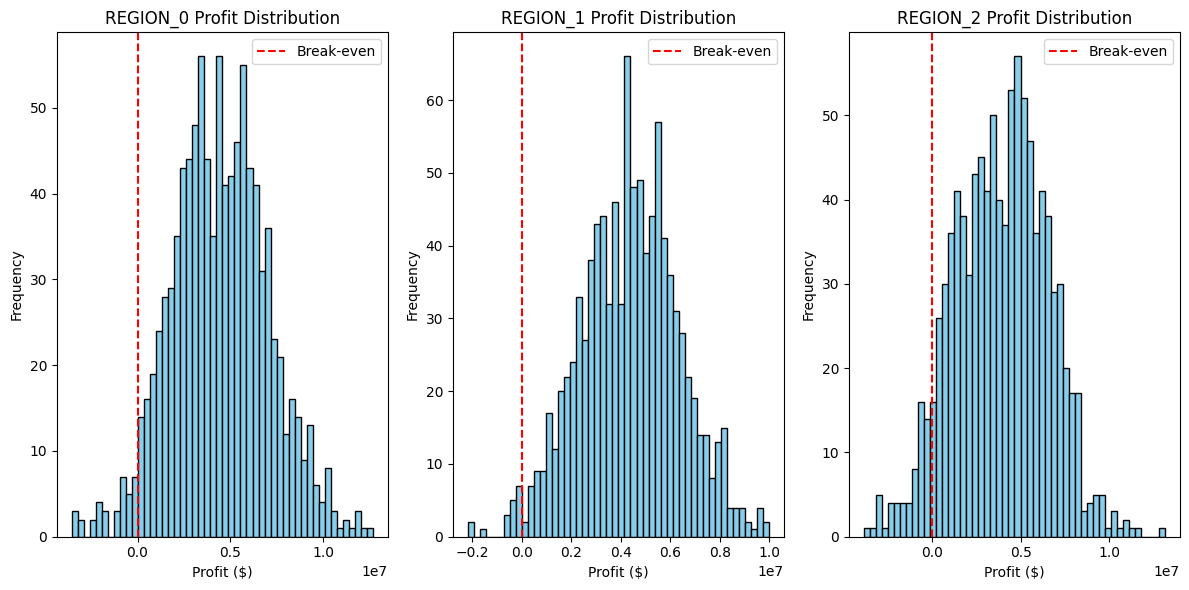

In [44]:
# Plot histograms of profit distributions for each region
plt.figure(figsize=(12, 6))

for i, (region, df) in enumerate(data.items()):
    profits = bootstrap_profit(df)
    plt.subplot(1, 3, i+1)
    plt.hist(profits, bins=50, color='skyblue', edgecolor='black')
    plt.title(f'{region.upper()} Profit Distribution')
    plt.xlabel('Profit ($)')
    plt.ylabel('Frequency')
    plt.axvline(x=0, color='red', linestyle='--', label='Break-even')
    plt.legend()

plt.tight_layout()
plt.show()


**Key Observations & Findings:**
**`1. Region 0`**
- Average Profit: $4.45 million — highest among all three.

- Confidence Interval: Wide, from (-$450K to $9.62M), indicating moderate uncertainty.

- Risk of Loss: 3.60% — above the 2.5% threshold.

- Fails the risk condition, despite having the highest average profit.

**`2. Region 1`**
- Average Profit: $4.37 million — slightly lower than Region 0.

- Confidence Interval: ($417K to $8.22M) — narrower and more reliable than Region 0.

- Risk of Loss: 1.80% — lowest of all regions and below the 2.5% threshold.

- Meets all criteria: strong profitability + low risk.

**`Region 2`**
- Average Profit: $3.88 million — lowest of the three.

- Confidence Interval: very wide, from (-$1.04M to $8.51M).

- Risk of Loss: 6.70% — significantly exceeds the allowed 2.5%.

- High risk and lower average return — not suitable for development.

**Recommendation:**
We Select `Region 1` for developing new oil wells.

**Why?**
- It meets the profitability threshold, with a solid $4.37M average return.

- It has the lowest risk of loss (1.80%), staying under the 2.5% maximum.

- The confidence interval is fully positive, which shows reliable expected gains.



<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
Excellent! Loved your project ;)
</div>